# Import
(the sections are because of my mother)

In [ ]:
import pandas as pd
import numpy as np
import math

import sklearn
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

# sklearn data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# sklearn decision trees
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

# evaluation
from sklearn.metrics.pairwise import pairwise_distances_argmin

# tree visualizer
from sklearn import tree

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline

from yellowbrick.cluster import KElbowVisualizer # cluster visualizer

In [ ]:
# stuff my mother gave me
def pie_cate(df,category):
    count_value = df.groupby([category]).size().reset_index(name='counts') # find frequency of each unique value
    count_value['%count'] = [round(num/len(df)*100,2) for num in list(count_value['counts'])] # get frequenc distribution
    print(count_value)

    value_list = count_value[category].tolist()
    count_list = count_value['counts'].tolist()
    fig = plt.figure(figsize=(8, 4))

    plt.pie(count_list, labels=value_list)
    plt.show()

def data_exploration (df, column):
    if (str(df[column].dtypes) == 'object'or str(df[column].dtypes) == 'category'):
        if df[column].nunique()<10:
            count_value = df.groupby([column]).size().reset_index(name='counts')
            count_value['%count'] = [round(num/len(df)*100,2) for num in list(count_value['counts'])]
            print(count_value)
            value_list = count_value[column].tolist()
            count_list = count_value['counts'].tolist()
            fig = plt.figure(figsize=(8, 4))
            plt.bar(x=value_list, height= count_list)
            plt.xticks(fontsize=12)
            plt.show()
        else:
            print(column + ' has more than 10 unique values')
    else:
        mean = df[column].describe()['mean']
        std = df[column].describe()['std']
        outlier = df[((df[column]-mean)/std >3) | ((df[column]-mean)/std <-3)][column].tolist()
        if len(outlier) > 0:
            print('There are ' + str(len(outlier)) + ' of outliers for ' + column + '.')
            print(outlier)
        else:
            print('There is no outlier of ' + column + '.')

        ## this is to create box plot
        print('----------------------Box plot---------------------')
        df[column].plot.box(title=column, whis =(5,95))
        plt.grid()
        plt.show()

        ## this is to plot interval column distribution by a decile
        min_value = float(df[column].describe()['min'])
        max_value = float(df[column].describe()['max'])
        if df[column].nunique() >= 10:
            para = (max_value - min_value) / 10
            para_list = np.arange(min_value, max_value, para).round(decimals=2).tolist()
            count_table = df.loc[:, [column]]
            for num in para_list:
                count_table.loc[count_table[column] >= num, 'range'] = num
            count_table_sum = count_table.groupby(['range']).size().reset_index(name='counts')
            value_list = count_table_sum['range'].tolist()
            count_list = count_table_sum['counts'].tolist()
            print('----------------------Distribution plot---------------------')
            fig = plt.figure(figsize=(8, 4))
            plt.bar(x=value_list, height=count_list, width=para, tick_label=value_list, align='edge')
            plt.xticks(rotation=40, fontsize=12)
            plt.grid()
            plt.show()

def metadata(df):
  columns_list = list(df.columns.values) # get a list of column names
  type_list = [str(item) for item in list(df.dtypes)] # get data types
  missing_list = [round(float(num),2) for num in list((df.isnull().sum()/len(df)*100))] # find percentage of missing values
  unique_list = [int(nunique) for nunique in list(df.nunique())] # find unique values for each column
  # # return basic stats for interval columns (i.e. not a category or object datatype and more than 10 unique values)
  metadata = pd.DataFrame(columns_list, columns=['column_name'])
  metadata['datatype'] = type_list
  metadata['missing_percent'] = missing_list
  metadata['unique'] = unique_list
  try:
    desc_interval = df[[item for item in columns_list if str(df[item].dtypes) != 'category' and df[item].nunique()>=10 and str(df[item].dtypes) != 'object']].describe().loc[['mean', 'std', 'min','25%', '50%', '75%', 'max']].transpose().reset_index().rename(columns = {'index':'column_name'})
    metadata = pd.merge(metadata, desc_interval, on='column_name', how='left')
  except:
    metadata
  return metadata

# Data

* Beak.Length_Culmen (mm): Length from the tip of the beak to the base of the skull
* Beak.Length_Nares (mm): Length from the anterior edge of the nostrils to the tip of the beak
* Beak.Width (mm): Width of the beak at the anterior edge of the nostrils
* Beak.Depth (mm): Depth of the beak at the anterior edge of the nostrils
* Tarsus.Length (mm): Length of the tarsus from the posterior notch between tibia and tarsus, to the end of the last scale of acrotarsium (at the bend of the foot)
* Wing.Length (mm): Length from the carpal joint (bend of the wing) to the tip of the longest primary on the unflattened wing
* Kipps.Distance,Length from the tip of the first secondary feather to the tip of the longest primary      
* Secondary1 (mm): Length from the carpal joint (bend of the wing) to the tip of the first secondary. Secondary1 is roughly equivalent to Wing length minus Kipp’s distance (measured in a fully folded and flat wing)"
* Hand-Wing.Index (index value): 100*DK/Lw, where DK is Kipp’s distance and Lw is wing length (i.e., Kipp’s distance corrected for wing size).
* Tail.Length (mm): Distance between the tip of the longest rectrix and the point at which the two central rectrices protrude from the skin.
* Mass (gram): Body mass given as species average (incorporating both male and female body mass)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#filename = '/content/drive/MyDrive/Data/AVONET2_eBird!.xlsx'
#df = pd.read_excel(filename, sheet_name='Caprimulgiformes Traits')
#print(df)

          Family2  Beak_Length_Culmen  Beak_Length_Nares  Beak_Width  \
0    Aegothelidae                17.8                6.2         5.1   
1    Aegothelidae                11.6                4.2         3.2   
2    Aegothelidae                12.9                3.6         3.5   
3    Aegothelidae                15.6                5.6         4.4   
4    Aegothelidae                23.3                8.2         8.4   
..            ...                 ...                ...         ...   
591   Trochilidae                24.9               20.4         2.6   
592   Trochilidae                33.3               27.3         3.1   
593   Trochilidae                32.2               25.0         2.5   
594   Trochilidae                20.7               18.4         1.9   
595   Trochilidae                23.0               19.8         1.6   

     Beak_Depth  Tarsus_Length  Wing_Length  Kipps_Distance  Secondary1  \
0           4.2           20.6        135.7            40.1 

In [ ]:
filename = '/content/drive/MyDrive/Papers/Data/AVONET2_eBird!.xlsx'
df = pd.read_excel(filename, sheet_name='Caprimulgiformes Traits')
print(df)

          Family2  Beak_Length_Culmen  Beak_Length_Nares  Beak_Width  \
0    Aegothelidae                17.8                6.2         5.1   
1    Aegothelidae                11.6                4.2         3.2   
2    Aegothelidae                12.9                3.6         3.5   
3    Aegothelidae                15.6                5.6         4.4   
4    Aegothelidae                23.3                8.2         8.4   
..            ...                 ...                ...         ...   
591   Trochilidae                24.9               20.4         2.6   
592   Trochilidae                33.3               27.3         3.1   
593   Trochilidae                32.2               25.0         2.5   
594   Trochilidae                20.7               18.4         1.9   
595   Trochilidae                23.0               19.8         1.6   

     Beak_Depth  Tarsus_Length  Wing_Length  Kipps_Distance  Secondary1  \
0           4.2           20.6        135.7            40.1 

         Family2  counts  %count
0   Aegothelidae      10    1.68
1       Apodidae     112   18.79
2  Caprimulgidae      96   16.11
3  Hemiprocnidae       4    0.67
4    Nyctibiidae       7    1.17
5     Podargidae      16    2.68
6    Trochilidae     351   58.89


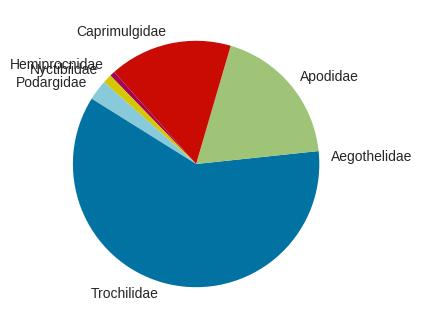

In [ ]:
pie_cate(df,'Family2')

In [ ]:
df.columns

Index(['Family2', 'Beak_Length_Culmen', 'Beak_Length_Nares', 'Beak_Width',
       'Beak_Depth', 'Tarsus_Length', 'Wing_Length', 'Kipps_Distance',
       'Secondary1', 'Hand-Wing_Index', 'Tail_Length', 'Mass'],
      dtype='object')

In [ ]:
# Look at information about the data
df2=metadata(df)

# Data Preparation
K-means clustering uses Euclidean distance to measure similarity. If features have very different scales (e.g., Mass in grams vs. Beak length in mm), the larger-scale features will dominate the distance computation. For example:
* Mass: range from 1.9 - 547
* Beak_depth: range from 1.0 - 27.6<br>
Scaling ensures that each feature contributes equally to the clustering process, avoiding bias toward high-variance features.

In [ ]:
# filename = 'AVONET2_eBird!.xlsx'
# df = pd.read_excel(filename, sheet_name='Caprimulgiformes Traits')
# print(df)

In [ ]:
y = df.iloc[:, 0].to_numpy() # for predictions
X = df.iloc[:, 1:].to_numpy() # for clustering
print(X.shape, y.shape)

(596, 11) (596,)


In [ ]:
scaler = StandardScaler()
X_std_features = scaler.fit_transform(X)
X_std_features[:5]

array([[-0.19532306, -0.82050102,  0.3787701 ,  0.69687836,  2.11565072,
         0.71757982, -0.4902526 ,  1.62389785, -2.77736078,  0.98760175,
         0.71444154],
       [-0.87494433, -1.0491319 , -0.06042636,  0.60714313,  1.78980619,
         0.32557802, -0.69733067,  1.15640449, -2.75891406,  0.43364442,
         0.19304931],
       [-0.73244309, -1.11772117,  0.00892045, -0.02100346,  1.75360124,
         0.37073952, -0.595489  ,  1.14142072, -2.57444688,  0.5885338 ,
         0.09633946],
       [-0.43647899, -0.88909028,  0.21696088,  0.56227552,  1.89842103,
         0.4845465 , -0.50043677,  1.24630706, -2.51910673,  0.93475714,
         0.71444154],
       [ 0.40756677, -0.59187013,  1.14158501,  1.50449541,  2.89405711,
         1.23964673, -0.3239112 ,  2.34012165, -2.98027468,  1.47413665,
         2.31225643]])

# Clustering
K-means clustering using Sklearn.


## Determine number of clusters
The optimal number of clusters (k) can be determined using the elbow method. As number of clusters increase, the sum of squares error (SSE) within the cluster decreases because the data points gets closer to their respective cluster center. The elbow method aims to find k where SSE decreases most rapidly.

Use KElbowVisualizer from ``Yellowbrick cluster module to visualize the cluster.

The Elbow score used is Within-Cluster Sum of Squares (WCSS). This is the sum of squared distances between each point in a cluster and the centroid of that cluster. As the number of clusters increases, the WCSS decreases because the clusters are smaller and their centroids are closer to the points in the cluster.

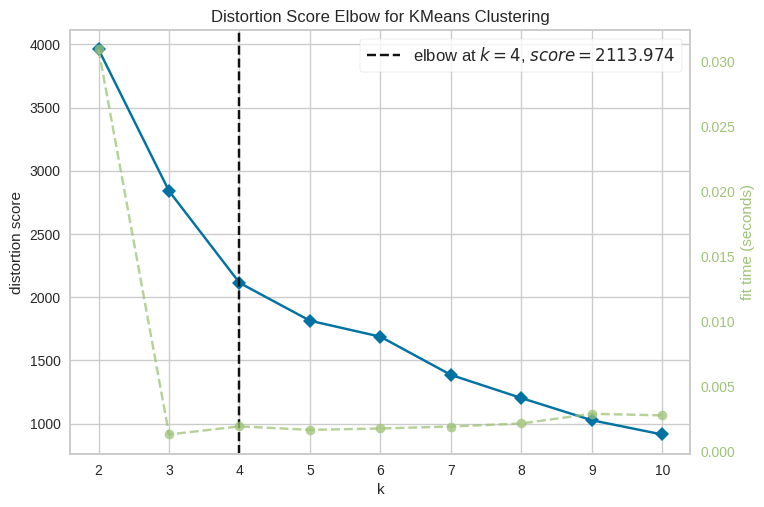

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KElbowVisualizer(KMeans(), k=10)
model.fit(X_std_features)
model.show()

## Four Clusters
1. Create four clusters.
2. Add cluster labels to the features
3. Explore if there are outlier clusters.

In [ ]:
k_means_4 = KMeans(init="k-means++",
                   n_clusters=4,
                   n_init=10,
                   max_iter=300,
                   random_state=101)

k_means_4.fit(X_std_features)

KMeans(n_clusters=4, n_init=10, random_state=101)

In [ ]:
# Add labels
# coordinates of cluster center
k_means_4_centroids = k_means_4.cluster_centers_

# assign a cluster label to each data point
k_means_4_labels = pairwise_distances_argmin(X_std_features,
                                             k_means_4_centroids)

print(k_means_4_labels[:5])

[2 2 2 2 2]


In [ ]:
# Cluster 3 is an outlier cluster
unique, counts = np.unique(k_means_4_labels, return_counts=True)
print(unique, counts)

[0 1 2 3] [351 114 117  14]


# Evaluation

## 4 Cluster Normalized Cluster Means Plot
1. Copy the original dataframe
2. Add cluster label to the original dataframe
3. Save the labeled file to csv for inspection

In [ ]:
Cluster_4_label_df = df.copy()
Cluster_4_label_df['label'] = k_means_4_labels

print(Cluster_4_label_df.head())

        Family2  Beak_Length_Culmen  Beak_Length_Nares  Beak_Width  \
0  Aegothelidae                17.8                6.2         5.1   
1  Aegothelidae                11.6                4.2         3.2   
2  Aegothelidae                12.9                3.6         3.5   
3  Aegothelidae                15.6                5.6         4.4   
4  Aegothelidae                23.3                8.2         8.4   

   Beak_Depth  Tarsus_Length  Wing_Length  Kipps_Distance  Secondary1  \
0         4.2           20.6        135.7            40.1        95.6   
1         4.0           18.8        114.0            34.0        80.0   
2         2.6           18.6        116.5            37.0        79.5   
3         3.9           19.4        122.8            39.8        83.0   
4         6.0           24.9        164.6            45.0       119.5   

   Hand-Wing_Index  Tail_Length   Mass  label  
0             29.6        117.4   60.0      2  
1             29.8         87.0   35.2      

In [ ]:
#Cluster_4_label_df.to_csv('/content/drive/MyDrive/Papers/Data/Cluster_4_All.csv')

In [ ]:
Cluster_4_label_feature_df = Cluster_4_label_df.iloc[:, 1:]
Cluster_4_label_feature_df.head(3)

,Beak_Length_Culmen,Beak_Length_Nares,Beak_Width,Beak_Depth,Tarsus_Length,Wing_Length,Kipps_Distance,Secondary1,Hand-Wing_Index,Tail_Length,Mass,label
0,17.8,6.2,5.1,4.2,20.6,135.7,40.1,95.6,29.6,117.4,60.0,2
1,11.6,4.2,3.2,4.0,18.8,114.0,34.0,80.0,29.8,87.0,35.2,2
2,12.9,3.6,3.5,2.6,18.6,116.5,37.0,79.5,31.8,95.5,30.6,2


In [ ]:
# use the following code to plot normalized mean plot

# Extract the list of feature columns from the DataFrame
Cluster_4_column_list = list(Cluster_4_label_feature_df.columns)

# Initialize a list to store the normalized mean values for each feature
Cluster_4_plot_list = []

# Iterate through all features (excluding the last 'label' from clustering)
for feature in Cluster_4_column_list[:-1]:
  plot_dic = {} # Dictionary to hold plotting data for one feature
  plot_dic['feature'] = feature

  # Calculate the mean of the feature for each cluster label (0, 1, 2, 4)
  label_table = pd.DataFrame({
      'mean' : Cluster_4_label_feature_df.groupby(['label'])[feature].mean()
                              }).reset_index()

  # Append a row with the overall mean for the feature
  label_table.loc[len(label_table.index)] = ['overall',
                                             Cluster_4_label_feature_df[feature].mean()]

  # Normalize the mean values to range [0, 1] for fair comparison across features
  label_table['normalize'] = (
      (label_table['mean'] - label_table['mean'].min())
      / (label_table['mean'].max() - label_table['mean'].min())
  )

  # Extract normalized values for each cluster and the overall mean, rounded to 3 decimals
  plot_dic['0_norm'] = round(label_table.iloc[0]['normalize'], 3)
  plot_dic['1_norm'] = round(label_table.iloc[1]['normalize'], 3)
  plot_dic['2_norm'] = round(label_table.iloc[2]['normalize'], 3)
  plot_dic['3_norm'] = round(label_table.iloc[3]['normalize'], 3)
  plot_dic['overall_norm'] = round(label_table.iloc[4]['normalize'], 3)

  Cluster_4_plot_list.append(plot_dic)

In [ ]:
# See the normalized mean profile table
Cluster_4_plot_table = pd.DataFrame(Cluster_4_plot_list)
Cluster_4_plot_table

,feature,0_norm,1_norm,2_norm,3_norm,overall_norm
0,Beak_Length_Culmen,0.743,0.000,0.500,1.00,0.560
1,Beak_Length_Nares,0.918,0.000,0.239,1.00,0.611
2,Beak_Width,0.000,0.024,0.110,1.00,0.050
3,Beak_Depth,0.000,0.015,0.111,1.00,0.048
4,Tarsus_Length,0.000,0.424,0.900,1.00,0.281
5,Wing_Length,0.000,0.648,0.982,1.00,0.340
6,Kipps_Distance,0.000,1.000,0.806,0.11,0.352
7,Secondary1,0.000,0.194,0.646,1.00,0.187
8,Hand-Wing_Index,0.903,1.000,0.491,0.00,0.819
9,Tail_Length,0.000,0.142,0.889,1.00,0.225


<ipython-input-28-ede1ad1632b0>:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(0-0.05, i, Cluster_4_plot_table.iloc[i][0],


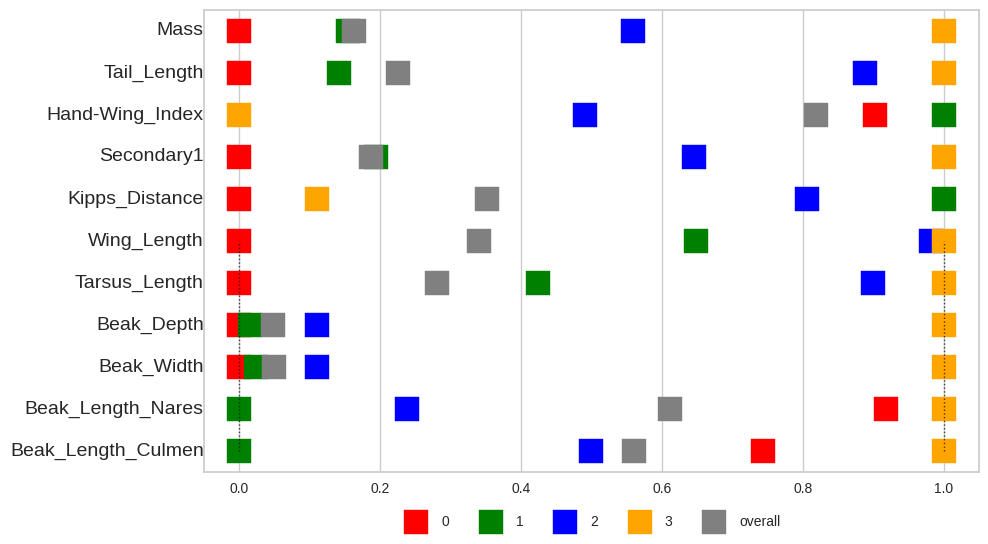

In [ ]:
from numpy.ma.core import size
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
# write the vertical lines
ax.vlines(x=0, ymin=0, ymax=5, color='black',
          alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=1, ymin=0, ymax=5, color='black',
          alpha=0.7, linewidth=1, linestyles='dotted')

y_reversed_index = list(range(len(Cluster_4_plot_table)))
# y_reversed_index.reverse() # mistakes were made...

ax.scatter(x = Cluster_4_plot_table['0_norm'],
           y = y_reversed_index, marker = 's', s=300,
           c='red', label = '0')
ax.scatter(x = Cluster_4_plot_table['1_norm'],
           y = y_reversed_index, marker = 's', s=300,
           c='green', label = '1')
ax.scatter(x = Cluster_4_plot_table['2_norm'],
           y = y_reversed_index, marker = 's', s=300,
           c='blue', label = '2')
ax.scatter(x = Cluster_4_plot_table['3_norm'],
           y = y_reversed_index, marker = 's', s=300,
           c='orange', label = '3')
ax.scatter(x = Cluster_4_plot_table['overall_norm'],
           y = y_reversed_index, marker = 's', s=300,
           c='grey', label = 'overall')

for i in y_reversed_index:
  ax.text(0-0.05, i, Cluster_4_plot_table.iloc[i][0],
            horizontalalignment='right',
            verticalalignment='center',
            fontdict={'size':14})

ax.legend(loc='lower center',
          ncol=10,
          bbox_to_anchor=(0.5, -0.15))
ax.get_yaxis().set_visible(False)

In [ ]:
# See the normalized mean profile table
# Cluster 3 is very large bird with large beak, mas, wing, and Tarsus
# But small Kpps distance and Hand-Wing Index
Cluster_4_plot_table = pd.DataFrame(Cluster_4_plot_list)
Cluster_4_plot_table

,feature,0_norm,1_norm,2_norm,3_norm,overall_norm
0,Beak_Length_Culmen,0.743,0.000,0.500,1.00,0.560
1,Beak_Length_Nares,0.918,0.000,0.239,1.00,0.611
2,Beak_Width,0.000,0.024,0.110,1.00,0.050
3,Beak_Depth,0.000,0.015,0.111,1.00,0.048
4,Tarsus_Length,0.000,0.424,0.900,1.00,0.281
5,Wing_Length,0.000,0.648,0.982,1.00,0.340
6,Kipps_Distance,0.000,1.000,0.806,0.11,0.352
7,Secondary1,0.000,0.194,0.646,1.00,0.187
8,Hand-Wing_Index,0.903,1.000,0.491,0.00,0.819
9,Tail_Length,0.000,0.142,0.889,1.00,0.225


## 3 Cluster Normalized Cluster Means Plot
Exclude cluster 3 which is an outlier cluster.


In [ ]:
Cluster_3_label_feature_df = Cluster_4_label_feature_df[Cluster_4_label_feature_df['label'] != 3]
Cluster_3_label_feature_df

,Beak_Length_Culmen,Beak_Length_Nares,Beak_Width,Beak_Depth,Tarsus_Length,Wing_Length,Kipps_Distance,Secondary1,Hand-Wing_Index,Tail_Length,Mass,label
0,17.8,6.2,5.1,4.2,20.6,135.7,40.1,95.6,29.6,117.4,60.0,2
1,11.6,4.2,3.2,4.0,18.8,114.0,34.0,80.0,29.8,87.0,35.2,2
2,12.9,3.6,3.5,2.6,18.6,116.5,37.0,79.5,31.8,95.5,30.6,2
3,15.6,5.6,4.4,3.9,19.4,122.8,39.8,83.0,32.4,114.5,60.0,2
4,23.3,8.2,8.4,6.0,24.9,164.6,45.0,119.5,27.4,144.1,136.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
591,24.9,20.4,2.6,2.0,5.8,53.4,33.1,21.1,60.9,33.9,5.0,0
592,33.3,27.3,3.1,2.8,8.2,78.6,49.3,30.2,62.0,46.8,11.4,0
593,32.2,25.0,2.5,2.3,6.4,73.7,47.5,26.1,64.5,43.5,11.4,0
594,20.7,18.4,1.9,1.6,5.1,50.6,32.0,18.8,63.0,36.4,3.9,0


In [ ]:
# Extract the list of feature columns from the DataFrame
Cluster_3_column_list = list(Cluster_3_label_feature_df.columns)

# Initialize a list to store the normalized mean values for each feature
Cluster_3_plot_list = []

# Iterate through all features (excluding the last 'label' from clustering)
for feature in Cluster_3_column_list[:-1]:
  plot_dic = {} # Dictionary to hold plotting data for one feature
  plot_dic['feature'] = feature

  # Calculate the mean of the feature for each cluster label (0, 1, 2, 4)
  label_table = pd.DataFrame({
      'mean' : Cluster_3_label_feature_df.groupby(['label'])[feature].mean()
                              }).reset_index()

  # Append a row with the overall mean for the feature
  label_table.loc[len(label_table.index)] = ['overall',
                                             Cluster_3_label_feature_df[feature].mean()]

  # Normalize the mean values to range [0, 1] for fair comparison across features
  label_table['normalize'] = (
      (label_table['mean'] - label_table['mean'].min())
      / (label_table['mean'].max() - label_table['mean'].min())
  )

  # Extract normalized values for each cluster and the overall mean, rounded to 3 decimals
  plot_dic['0_norm'] = round(label_table.iloc[0]['normalize'], 3)
  plot_dic['1_norm'] = round(label_table.iloc[1]['normalize'], 3)
  plot_dic['2_norm'] = round(label_table.iloc[2]['normalize'], 3)
  plot_dic['overall_norm'] = round(label_table.iloc[3]['normalize'], 3)

  Cluster_3_plot_list.append(plot_dic)

In [ ]:
# See the normalized mean profile table
Cluster_3_plot_table = pd.DataFrame(Cluster_3_plot_list)
Cluster_3_plot_table

,feature,0_norm,1_norm,2_norm,overall_norm
0,Beak_Length_Culmen,1.000,0.000,0.673,0.738
1,Beak_Length_Nares,1.000,0.000,0.260,0.655
2,Beak_Width,0.000,0.215,1.000,0.243
3,Beak_Depth,0.000,0.134,1.000,0.227
4,Tarsus_Length,0.000,0.472,1.000,0.293
5,Wing_Length,0.000,0.660,1.000,0.330
6,Kipps_Distance,0.000,1.000,0.806,0.358
7,Secondary1,0.000,0.301,1.000,0.260
8,Hand-Wing_Index,0.809,1.000,0.000,0.684
9,Tail_Length,0.000,0.160,1.000,0.232


<ipython-input-76-49331a76ca16>:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(0-0.05, i, Cluster_3_plot_table.iloc[i][0],


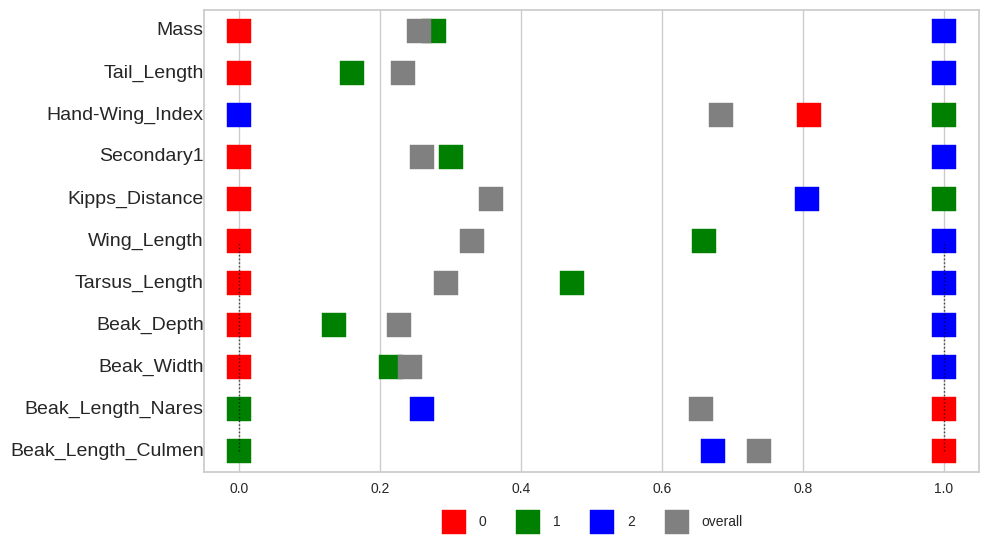

In [ ]:
from numpy.ma.core import size
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
# write the vertical lines
ax.vlines(x=0, ymin=0, ymax=5, color='black',
          alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=1, ymin=0, ymax=5, color='black',
          alpha=0.7, linewidth=1, linestyles='dotted')

y_reversed_index = list(range(len(Cluster_3_plot_table)))
# y_reversed_index.reverse() # mistakes were made...

ax.scatter(x = Cluster_3_plot_table['0_norm'],
           y = y_reversed_index, marker = 's', s=300,
           c='red', label = '0')
ax.scatter(x = Cluster_3_plot_table['1_norm'],
           y = y_reversed_index, marker = 's', s=300,
           c='green', label = '1')
ax.scatter(x = Cluster_3_plot_table['2_norm'],
           y = y_reversed_index, marker = 's', s=300,
           c='blue', label = '2')
ax.scatter(x = Cluster_3_plot_table['overall_norm'],
           y = y_reversed_index, marker = 's', s=300,
           c='grey', label = 'overall')

for i in y_reversed_index:
  ax.text(0-0.05, i, Cluster_3_plot_table.iloc[i][0],
            horizontalalignment='right',
            verticalalignment='center',
            fontdict={'size':14})

ax.legend(loc='lower center',
          ncol=10,
          bbox_to_anchor=(0.5, -0.15))
ax.get_yaxis().set_visible(False)


## 4 Cluster Feature Importance
Use tree-based models to convert the clustering results into supervised classification problem. The classification model can then use to extract feature importances or describe each cluster using explantory rules.

* Change the cluster labels into a target variable
* Train a random forest classifier using the cluster labels as the target.
* Extract the feature importances from the model.

In [ ]:
Cluster_df = df.drop('Family2', axis=1)
Cluster_df.head(3)

,Beak_Length_Culmen,Beak_Length_Nares,Beak_Width,Beak_Depth,Tarsus_Length,Wing_Length,Kipps_Distance,Secondary1,Hand-Wing_Index,Tail_Length,Mass
0,17.8,6.2,5.1,4.2,20.6,135.7,40.1,95.6,29.6,117.4,60.0
1,11.6,4.2,3.2,4.0,18.8,114.0,34.0,80.0,29.8,87.0,35.2
2,12.9,3.6,3.5,2.6,18.6,116.5,37.0,79.5,31.8,95.5,30.6


In [ ]:
# Train a RF classifier with the default
# Overfitting is OK here because we are not worried about generalizability
RF_4_Kmeans = RandomForestClassifier(random_state=101)

RF_4_Kmeans.fit(Cluster_df, k_means_4_labels)

RandomForestClassifier(random_state=101)

In [ ]:
RF_4_Kmeans_Features = RF_4_Kmeans.feature_importances_

RF_Tree_4_Kmeans_Features_List = []

for i,v in enumerate(RF_4_Kmeans_Features):
  Tree_6_feature_dict = {}
  Tree_6_feature_dict['Features'] = Cluster_df.columns[i]
  Tree_6_feature_dict['Importance'] = round(v,3)
  RF_Tree_4_Kmeans_Features_List.append(Tree_6_feature_dict)

Cluster_4_RF_table = pd.DataFrame(RF_Tree_4_Kmeans_Features_List)

Cluster_4_RF_table.sort_values(by='Importance', ascending=False)

,Features,Importance
7,Secondary1,0.214
1,Beak_Length_Nares,0.208
5,Wing_Length,0.173
8,Hand-Wing_Index,0.070
4,Tarsus_Length,0.065
10,Mass,0.063
0,Beak_Length_Culmen,0.055
9,Tail_Length,0.050
6,Kipps_Distance,0.044
2,Beak_Width,0.037


## 3 Cluster Feature **Importance**

In [ ]:
Cluster_3_df = Cluster_3_label_feature_df.drop('label', axis=1)
Cluster_3_df.head(3)

,Beak_Length_Culmen,Beak_Length_Nares,Beak_Width,Beak_Depth,Tarsus_Length,Wing_Length,Kipps_Distance,Secondary1,Hand-Wing_Index,Tail_Length,Mass
0,17.8,6.2,5.1,4.2,20.6,135.7,40.1,95.6,29.6,117.4,60.0
1,11.6,4.2,3.2,4.0,18.8,114.0,34.0,80.0,29.8,87.0,35.2
2,12.9,3.6,3.5,2.6,18.6,116.5,37.0,79.5,31.8,95.5,30.6


In [ ]:
y = Cluster_3_label_feature_df.iloc[:, 11].to_numpy()
X = Cluster_3_label_feature_df.iloc[:, 0:10].to_numpy()
print(X.shape, y.shape)

(582, 10) (582,)


In [ ]:
RF_3_Kmeans = RandomForestClassifier(random_state=101)

RF_3_Kmeans.fit(X, y)

RandomForestClassifier(random_state=101)

In [ ]:
RF_3_Kmeans_Features = RF_3_Kmeans.feature_importances_

RF_Tree_3_Kmeans_Features_List = []

for i,v in enumerate(RF_3_Kmeans_Features):
  Tree_3_feature_dict = {}
  Tree_3_feature_dict['Features'] = Cluster_3_df.columns[i]
  Tree_3_feature_dict['Importance'] = round(v,3)
  RF_Tree_3_Kmeans_Features_List.append(Tree_3_feature_dict)

Cluster_3_RF_table = pd.DataFrame(RF_Tree_3_Kmeans_Features_List)

Cluster_3_RF_table.sort_values(by='Importance', ascending=False)

,Features,Importance
7,Secondary1,0.246
5,Wing_Length,0.223
1,Beak_Length_Nares,0.129
4,Tarsus_Length,0.101
8,Hand-Wing_Index,0.087
6,Kipps_Distance,0.083
0,Beak_Length_Culmen,0.075
2,Beak_Width,0.025
9,Tail_Length,0.024
3,Beak_Depth,0.005


## Describe 4 clusters using Decision Tree

In [ ]:
Cluster_4_label_df2 = Cluster_4_label_df.drop('Family2', axis=1)
Cluster_4_label_df2.head(3)

,Beak_Length_Culmen,Beak_Length_Nares,Beak_Width,Beak_Depth,Tarsus_Length,Wing_Length,Kipps_Distance,Secondary1,Hand-Wing_Index,Tail_Length,Mass,label
0,17.8,6.2,5.1,4.2,20.6,135.7,40.1,95.6,29.6,117.4,60.0,2
1,11.6,4.2,3.2,4.0,18.8,114.0,34.0,80.0,29.8,87.0,35.2,2
2,12.9,3.6,3.5,2.6,18.6,116.5,37.0,79.5,31.8,95.5,30.6,2


In [ ]:
(X_train, X_test,
 y_train, y_test) = train_test_split(Cluster_df,
                                             k_means_4_labels,
                                             stratify=k_means_4_labels,
                                             test_size=0.2,
                                             random_state=101)

print("The length of training set:", len(X_train))

print("The length of testing  set:", len(X_test))

The length of training set: 476
The length of testing  set: 120


In [ ]:
# Different seeds for training data
(X_train, X_test,
 y_train, y_test) = train_test_split(Cluster_df,
                                             k_means_4_labels,
                                             stratify=k_means_4_labels,
                                             test_size=0.2,
                                             random_state=333)

print("The length of training set:", len(X_train))
print("The length of testing  set:", len(X_test))

The length of training set: 476
The length of testing  set: 120


In [ ]:
# train a DT model using entropy and 1 % of training data
# max depth is the number of clusters
Cluster_4_DT = DecisionTreeClassifier(criterion='entropy',
                                  random_state=100,
                                  max_depth=3,
                                  min_samples_leaf=int(len(X_train)*0.01))

Cluster_4_DT = Cluster_4_DT.fit(X_train, y_train)

In [ ]:
# train a DT model using entropy and 1 % of training data with different random state for splitting
# max depth is the number of clusters
Cluster_4_DT_2 = DecisionTreeClassifier(criterion='entropy',
                                  random_state=333,
                                  max_depth=4)
                                  # min_samples_leaf=int(len(Cluster_df)*0.01)

Cluster_4_DT_2 = Cluster_4_DT.fit(Cluster_df, k_means_4_labels)

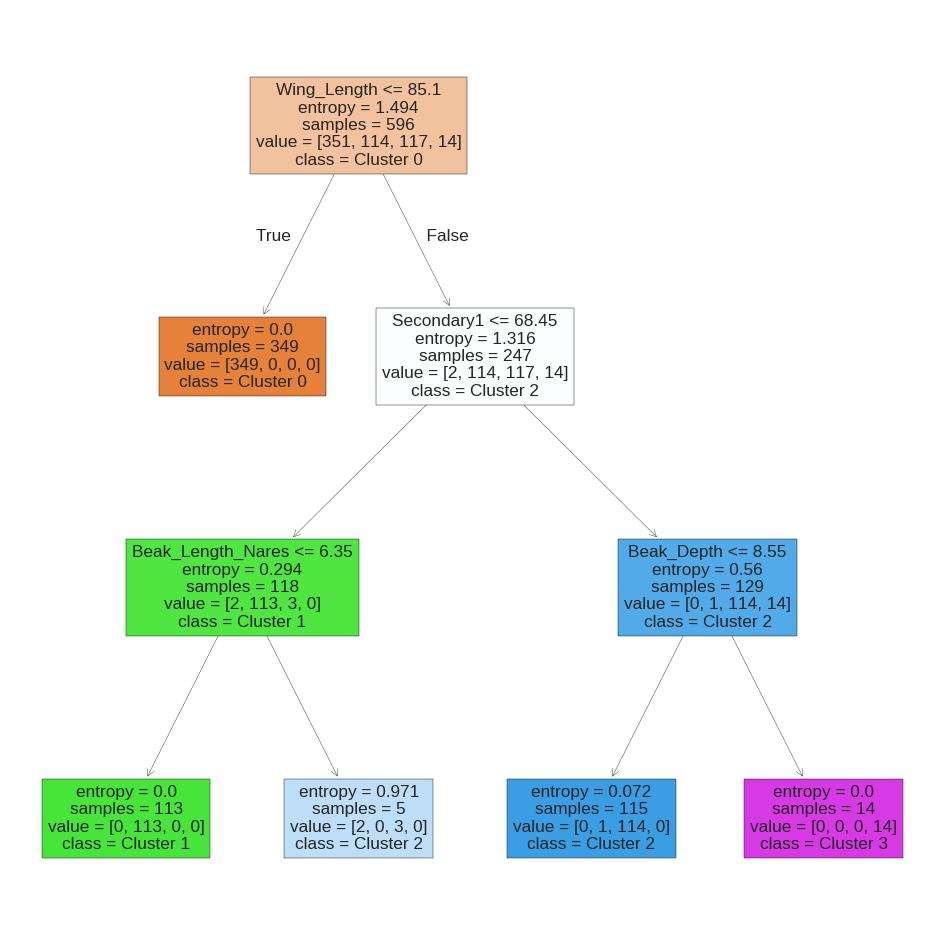

In [ ]:
fig = plt.figure(figsize=(12,12))
_ = tree.plot_tree(Cluster_4_DT_2,
                   feature_names=list(Cluster_df.columns),
                   class_names=['Cluster 0', 'Cluster 1','Cluster 2','Cluster 3'],
                   filled = True)

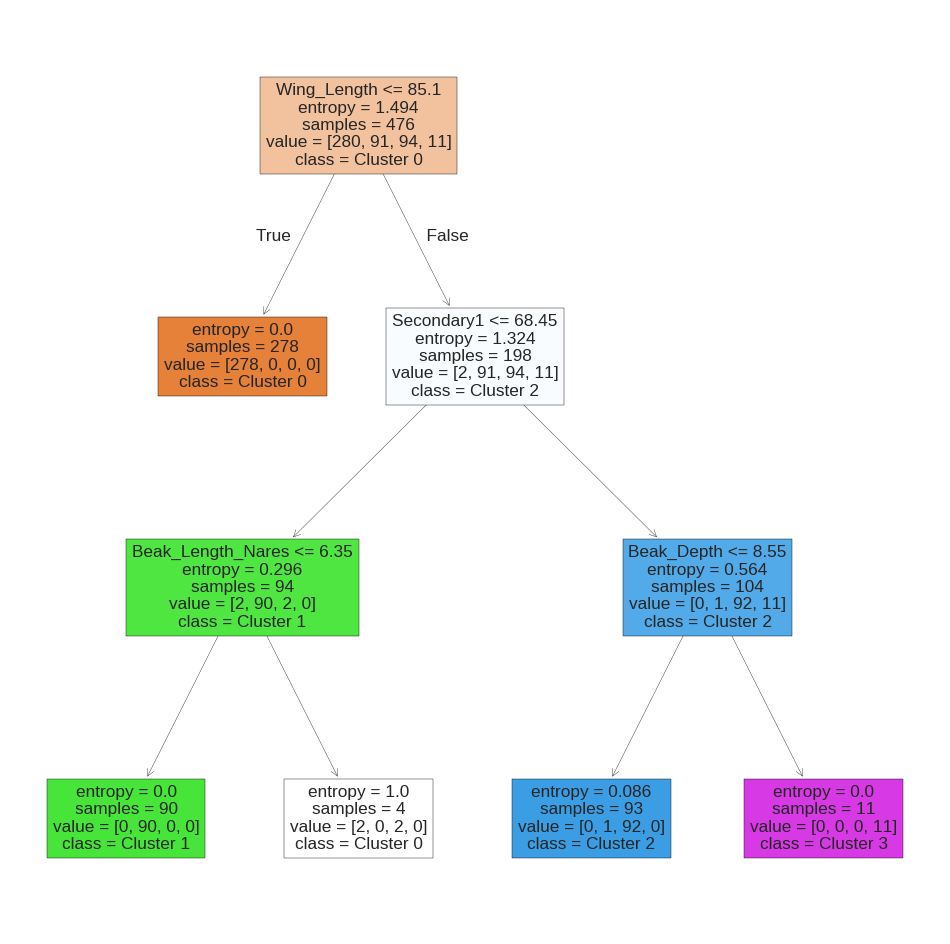

In [ ]:
fig = plt.figure(figsize=(12,12))
_ = tree.plot_tree(Cluster_4_DT,
                   feature_names=list(Cluster_df.columns),
                   class_names=['Cluster 0', 'Cluster 1','Cluster 2','Cluster 3'],
                   filled = True)

## Describe 3 clusters using Decision Tree

In [ ]:
(X_train, X_test,
 y_train, y_test) = train_test_split(Cluster_3_df,
                                             y,
                                             stratify=y,
                                             test_size=0.2,
                                             random_state=101)

print("The length of training set:", len(X_train))
print("The length of testing  set:", len(X_test))

The length of training set: 465
The length of testing  set: 117


In [ ]:
# train a DT model using entropy and 3 % of training data
# max depth is the number of clusters
Cluster_DT = DecisionTreeClassifier(criterion='entropy',
                                  random_state=100,
                                  max_depth=3,
                                  min_samples_leaf=int(len(X_train)*0.03))

Cluster_DT = Cluster_DT.fit(X_train, y_train)

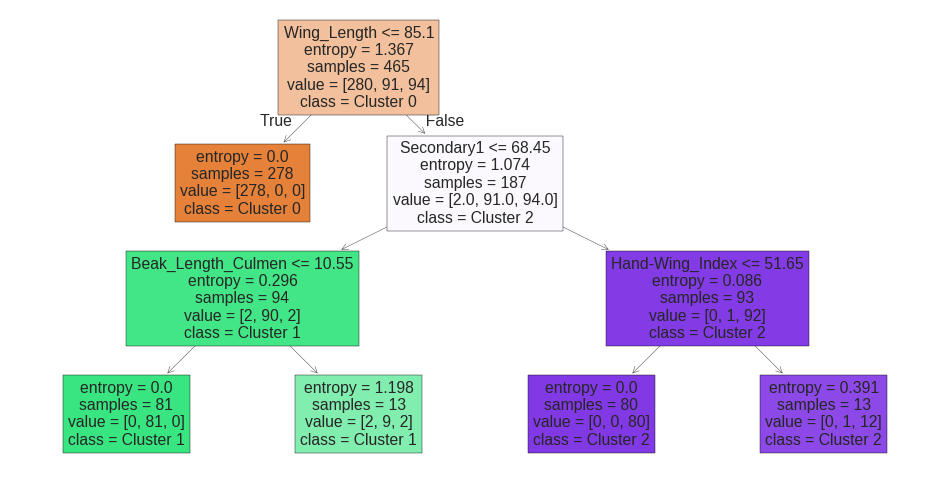

In [ ]:
fig = plt.figure(figsize=(12,6))
_ = tree.plot_tree(Cluster_DT,
                   feature_names=list(Cluster_3_df.columns),
                   class_names=['Cluster 0', 'Cluster 1','Cluster 2'],
                   filled = True)

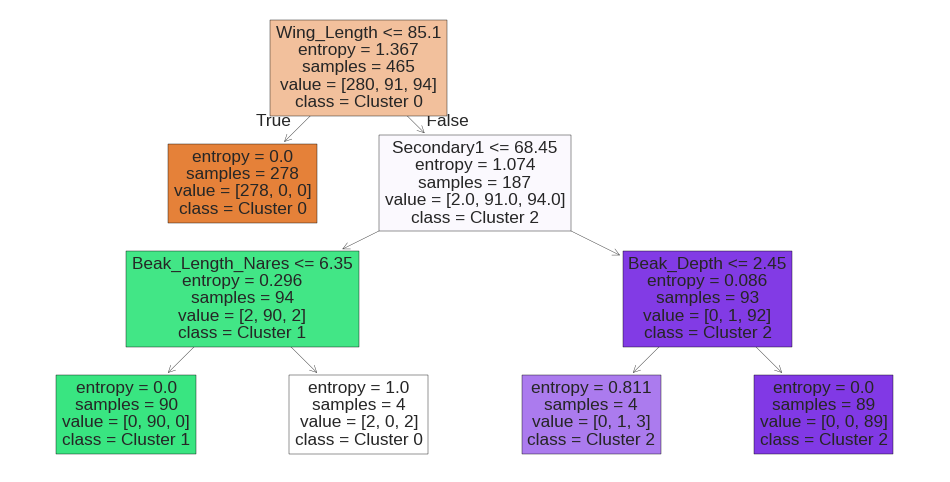

In [ ]:
# train a DT model using entropy and 1 % of training data
# max depth is 4
Cluster_DT_2 = DecisionTreeClassifier(criterion='entropy',
                                  random_state=100,
                                  max_depth=4,
                                  min_samples_leaf=int(len(X_train)*0.01))

Cluster_DT_2 = Cluster_DT_2.fit(X_train, y_train)

fig = plt.figure(figsize=(12,6))
_ = tree.plot_tree(Cluster_DT_2,
                   feature_names=list(Cluster_3_df.columns),
                   class_names=['Cluster 0', 'Cluster 1','Cluster 2'],
                   filled = True)

# Clustering with beak length only

(testing things out)

In [ ]:
beak_length = df[['Family2', 'Beak_Length_Culmen', 'Beak_Length_Nares']].copy()
beak_length

,Family2,Beak_Length_Culmen,Beak_Length_Nares
0,Aegothelidae,17.8,6.2
1,Aegothelidae,11.6,4.2
2,Aegothelidae,12.9,3.6
3,Aegothelidae,15.6,5.6
4,Aegothelidae,23.3,8.2
...,...,...,...
591,Trochilidae,24.9,20.4
592,Trochilidae,33.3,27.3
593,Trochilidae,32.2,25.0
594,Trochilidae,20.7,18.4


In [ ]:
y = beak_length.iloc[:, 0].to_numpy()
X = beak_length.iloc[:, 1:].to_numpy()

print(X.shape, y.shape)
y

(596, 2) (596,)


array(['Aegothelidae', 'Aegothelidae', 'Aegothelidae', 'Aegothelidae',
       'Aegothelidae', 'Aegothelidae', 'Aegothelidae', 'Aegothelidae',
       'Aegothelidae', 'Aegothelidae', 'Apodidae', 'Apodidae', 'Apodidae',
       'Apodidae', 'Apodidae', 'Apodidae', 'Apodidae', 'Apodidae',
       'Apodidae', 'Apodidae', 'Apodidae', 'Apodidae', 'Apodidae',
       'Apodidae', 'Apodidae', 'Apodidae', 'Apodidae', 'Apodidae',
       'Apodidae', 'Apodidae', 'Apodidae', 'Apodidae', 'Apodidae',
       'Apodidae', 'Apodidae', 'Apodidae', 'Apodidae', 'Apodidae',
       'Apodidae', 'Apodidae', 'Apodidae', 'Apodidae', 'Apodidae',
       'Apodidae', 'Apodidae', 'Apodidae', 'Apodidae', 'Apodidae',
       'Apodidae', 'Apodidae', 'Apodidae', 'Apodidae', 'Apodidae',
       'Apodidae', 'Apodidae', 'Apodidae', 'Apodidae', 'Apodidae',
       'Apodidae', 'Apodidae', 'Apodidae', 'Apodidae', 'Apodidae',
       'Apodidae', 'Apodidae', 'Apodidae', 'Apodidae', 'Apodidae',
       'Apodidae', 'Apodidae', 'Apodidae', 'Ap

In [ ]:
k_means_beak_length = KMeans(init="k-means++",
                   n_clusters=5,
                   n_init=10,
                   max_iter=300,
                   random_state=101)

k_means_beak_length.fit(X)

KMeans(n_clusters=5, n_init=10, random_state=101)

In [ ]:
y = df.iloc[:, 0].to_numpy()
X = df.iloc[:, 1:].to_numpy()

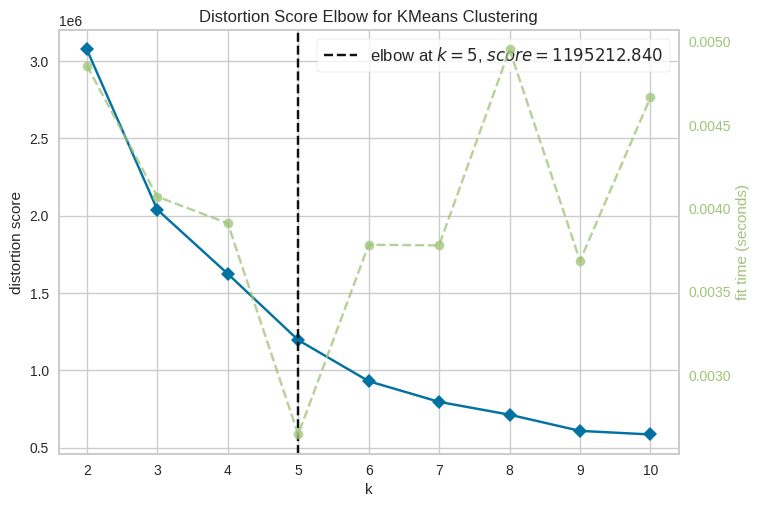

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KElbowVisualizer(KMeans(), k=10)
model.fit(X)
model.show()

In [ ]:
n_clusters1 = 5

In [ ]:
k_means_everything = KMeans(init="k-means++",
                   n_clusters=n_clusters1,
                   n_init=10,
                   max_iter=300,
                   random_state=101)

k_means_everything.fit(X)

KMeans(n_clusters=5, n_init=10, random_state=101)

In [ ]:
k_means_know = KMeans(init="k-means++",
               n_clusters=7,
               n_init=10,
               max_iter=300,
               random_state=101)

k_means_know.fit(X)

KMeans(n_clusters=7, n_init=10, random_state=101)

In [ ]:
elbow_labels = k_means_everything.labels_
print(elbow_labels)

[1 4 1 1 1 1 1 1 1 1 4 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 1 4 4 4 4 4 4 4 4 4 4 4 4 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 4 4 4 4 1 1 1 1 4 4 4 4 4 4 1 4 4 4 1 4
 4 1 1 0 4 4 4 4 4 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 4 1 1 1 1 1
 1 1 1 1 1 1 4 1 1 1 1 1 3 1 4 1 1 1 4 4 1 4 4 1 1 1 1 1 1 1 1 3 1 4 1 1 1
 2 1 2 2 2 1 2 1 2 1 1 2 1 1 1 1 1 1 1 1 2 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
know_labels = k_means_know.labels_
print(know_labels)

[1 1 1 1 4 1 1 1 1 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 4 4 4 4 0 0 0 0 0 0 4 0 0 0 4 0
 0 4 4 2 0 0 0 0 0 0 0 1 1 4 4 1 1 4 1 1 4 1 4 1 4 1 4 4 1 4 1 1 1 1 4 4 1
 1 4 1 4 1 4 1 1 4 1 1 1 1 1 4 1 1 1 4 1 1 4 1 4 4 1 4 4 5 1 1 1 1 4 4 4 4
 5 4 4 1 1 1 1 4 4 4 5 4 6 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 6 4 0 1 1 4
 3 1 3 5 5 4 5 1 5 1 1 5 1 1 1 1 1 1 1 5 3 5 5 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

In [ ]:
k_m_df = df.copy()

In [ ]:
k_m_df['labels'] = k_means_everything.labels_

In [ ]:
k_m_df.to_csv('/content/drive/MyDrive/Data/kmeans_5_cluster.csv')

In [ ]:
km_df_k = df.copy()

In [ ]:
km_df_k['labels'] = k_means_know.labels_

In [ ]:
km_df_k.to_csv('/content/drive/MyDrive/Data/kmeans_7_cluster.csv')

In [ ]:
data = df.to_numpy()

In [ ]:
from time import time

from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


def bench_k_means(kmeans, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(
            data,
            estimator[-1].labels_,
            metric="euclidean",
            sample_size=300,
        )
    ]

    # Show the results
    formatter_result = (
        "{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
    print(formatter_result.format(*results))

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

print(82 * "_")
print("init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")

kmeans = KMeans(init="k-means++", n_clusters=n_clusters1, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++", data=data, labels=labels)

kmeans = KMeans(init="random", n_clusters=n_clusters1, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=data, labels=labels)

pca = PCA(n_components=n_clusters1).fit(data)
kmeans = KMeans(init=pca.components_, n_clusters=n_clusters1, n_init=1)
bench_k_means(kmeans=kmeans, name="PCA-based", data=data, labels=labels)

print(82 * "_")

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette


NameError: name 'labels' is not defined

In [ ]:
import matplotlib.pyplot as plt

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]) #just use the columns themselves

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()